# 課題6

HHTTTTCTHCTTTTHHHCCHCCHHCHCHTCHCTHCCHHHHHHCTTCTHCCCTTCHTTHHTCTCHCTTHCTTTCHCHTTTHHCCHTHHHHTCHHHHTTHTTCTHHTHCHHTTTCTTCTHTHCCHTCHHCTCCTHHTHTCTHHTHCHTTTTCTCTHHCHHTHCTTTHCHTHTHHCTHHTHTTHTHHTHCCCCCTTHCTTTTCTTTCTHCTHCHHTHTCHCCTCCTCHTCCCCTTCTCHHHHTHCTHCCHHTCHCTCTTCHHHHTCHTCHTHCHHTTCTTCHTHHCTHTTHCHHHTTCTCHTCHCHCCHCCCHHTTTHHHTHCTHCTHHCTTCTCHCHCTCCHHCHTCTHTCCHTTHHTHCTCCHCCTHHHCCTTTTTCCHHCHTHCHTHHCHTHHCCHHTCCCHHTCCHTHTHHTCTTTHHHTTTHTCCHCHHTCTHTHCHHTCHCTCTTTHTCCCCHTHCHHTCTCHHTCCHTTTTHCTTTTTHCTHTTHCTHHCTCCHCTCTCHCCCTCHTCTCTCHTTTTHCHCCCHCCHHTTTCTCTTTCHTHCTCTTTCCTHTHCHTCTTHTHTCHCTCCCTCHTCHHCCHHTTTCHTCHHCCHHHT
Counter({'T': 210, 'H': 206, 'C': 184})


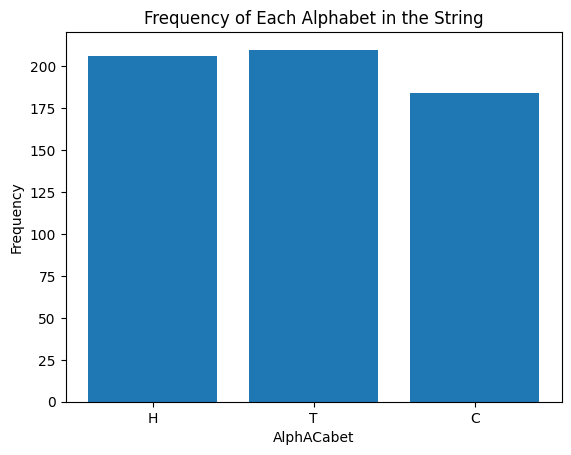

In [2]:
import random
from collections import Counter
import matplotlib.pyplot as plt

# random.seed(123)
characters = ['C', 'H', 'T']

target_str = ''.join(random.choice(characters) for i in range(600))

plt.bar(*zip(*Counter(target_str).items()))

plt.title('Frequency of Each Alphabet in the String')
plt.xlabel('AlphACabet')
plt.ylabel('Frequency')

print(target_str)
print(Counter(target_str))

OK.
Generated String : HHCTTTCCHHTTTCHTTCTTCTCTTTTTTTTTTCHCCCTTTHCTTTCCCTTTHCTTTCCHHCHHHCTCTCCCTTTTTCHCTTTTTCCTTTTTTTHCCTTTTTHCTTTCTTTHCCHHCTHCCCCHCTTHTTTCCHTTTTTCTTTTTCHHCCHTCTCTTTTTTTTTHHCCCCTTHTTTTTTCCCCCTCTTCCTTTTTTCHTTTTTTTTTTTTTTTTTCCHTCHCTTTTTTTCCCCCCTCTTTTCHCCCCHHHCHHHHTTTHHCCCCTTCTTTTCCCHCCTTTTHHTTTCTTCCTCCHCHHCTTCHHHCHCCTHCCCTTHCCTTTTTTTTTCHCCTCCCTTTCCTTTCHHHHCHCTTTTTHHHCHCCCHTCCHCCTCCCTTTTCTTTTTTTTTCCTHCTHCCTCTHHTCCTCTTTTTTCHCHCTCTTCTCTTCTTTTTCCHCCTTTTTHCCHCCTTHTTTCCTTTTCCHCHTCTTTTCCTTCCCTHCTTTHCHCCTHCCCTCTTCHCHCTTCTCCCCCCCTTTTTTTHHHCTTTTTCTTTTCHTCCTTTTTHCCHHCCHCHHTTTTTTTTCTTTTTTTTTTTTTTHCTCHCCTTCTTTTCTTHC


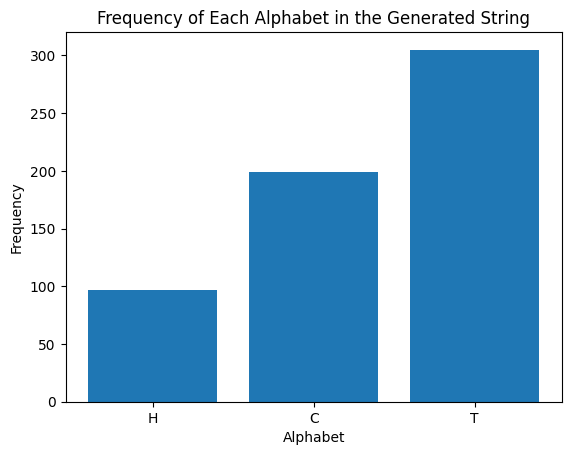

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

LENGTH = 600

transition_matrix = {
    'H': {'H': 0.3, 'T': 0.1, 'C': 0.6},
    'T': {'H': 0.1, 'T': 0.7, 'C': 0.2},
    'C': {'H': 0.2, 'T': 0.4, 'C': 0.4}
}

if sum(sum(transition_matrix[s].values()) for s in transition_matrix) != 3: print("Transition matrix is wrong.")
else: print("OK.")

state = 'H'
sequence = [state]

for i in range(LENGTH):
    next_state = np.random.choice(
        ['H', 'T', 'C'],
        p=[
            transition_matrix[state]['H'],
            transition_matrix[state]['T'],
            transition_matrix[state]['C']
        ])
    
    sequence.append(next_state)
    state = next_state

generated_str = ''.join(sequence)

print(f'Generated String : {generated_str}')

plt.bar(*zip(*Counter(generated_str).items()))

plt.title('Frequency of Each Alphabet in the Generated String')
plt.xlabel('Alphabet')
plt.ylabel('Frequency')

plt.show()

In [5]:
print(target_str)

print('-'*50)

def min_priority_queue(S):
    return sorted(S.items(), key=lambda x: x[1], reverse=True)

def extract_min(Q):
    return Q.pop()

def insert(Q, z):
    Q.append(z)

def huffman(S):
    Q = min_priority_queue(S)
    tree = []
    
    print("各文字の出現頻度:\n", Q, "\n\nハフマン木の構成:")
    while len(Q) > 1:
        print(Q)
        left, right = extract_min(Q), extract_min(Q)
        z = (left[0] + right[0], left[1] + right[1])
        insert(Q, z)
        tree += [[left, "0", left[0] + right[0]], [right, "1", left[0] + right[0]]]
        Q = min_priority_queue(dict(Q))
    
    tree.append([extract_min(Q), "", "top"])
    return tree

def print_result(tree, sl_1):
    result = []
    for node in tree:
        now, num = node[0][0], node[1]
        i = 0
        while tree[i][2] != 'top':
            if node[2] == tree[i][0][0]:
                num = tree[i][1] + num
                node, i = tree[i], 0
            else:
                i += 1
        if now in sl_1:
            result.append([now, num])
    return sorted(result)

def divide_string(S):
    return dict(Counter(S))
sl_1 = divide_string(target_str)
huffman_tree = huffman(sl_1)

print("\n符号を割り当てる")
total_length = total_length_2 = 0

for b in print_result(huffman_tree, sl_1):
    symbol, code = b[0], b[1]
    freq = sl_1[symbol]
    code_len = len(code)
    total_length += code_len * freq
    total_length_2 += freq * 8
    print(f"{symbol}: {code}: 符号長: {code_len}: 出現回数: {freq}: 総ビット長: {code_len * freq}")

print(f"\n各文字に８ビット割り当てた時の総ビット数: {total_length_2}")
print(f"ハフマン符号を使った場合の総ビット数: {total_length}")
print(f"\n圧縮率: {100 - (total_length / total_length_2 * 100):.2f}% (削減)")

HHTTTTCTHCTTTTHHHCCHCCHHCHCHTCHCTHCCHHHHHHCTTCTHCCCTTCHTTHHTCTCHCTTHCTTTCHCHTTTHHCCHTHHHHTCHHHHTTHTTCTHHTHCHHTTTCTTCTHTHCCHTCHHCTCCTHHTHTCTHHTHCHTTTTCTCTHHCHHTHCTTTHCHTHTHHCTHHTHTTHTHHTHCCCCCTTHCTTTTCTTTCTHCTHCHHTHTCHCCTCCTCHTCCCCTTCTCHHHHTHCTHCCHHTCHCTCTTCHHHHTCHTCHTHCHHTTCTTCHTHHCTHTTHCHHHTTCTCHTCHCHCCHCCCHHTTTHHHTHCTHCTHHCTTCTCHCHCTCCHHCHTCTHTCCHTTHHTHCTCCHCCTHHHCCTTTTTCCHHCHTHCHTHHCHTHHCCHHTCCCHHTCCHTHTHHTCTTTHHHTTTHTCCHCHHTCTHTHCHHTCHCTCTTTHTCCCCHTHCHHTCTCHHTCCHTTTTHCTTTTTHCTHTTHCTHHCTCCHCTCTCHCCCTCHTCTCTCHTTTTHCHCCCHCCHHTTTCTCTTTCHTHCTCTTTCCTHTHCHTCTTHTHTCHCTCCCTCHTCHHCCHHTTTCHTCHHCCHHHT
--------------------------------------------------
各文字の出現頻度:
 [('T', 210), ('H', 206), ('C', 184)] 

ハフマン木の構成:
[('T', 210), ('H', 206), ('C', 184)]
[('CH', 390), ('T', 210)]

符号を割り当てる
C: 10: 符号長: 2: 出現回数: 184: 総ビット長: 368
H: 11: 符号長: 2: 出現回数: 206: 総ビット長: 412
T: 0: 符号長: 1: 出現回数: 210: 総ビット長: 210

各文字に８ビット割り当てた時の総ビット数: 4800
ハフマン符号を使った場合の総ビット数: 990

圧縮率: 79.38% (削減)


In [6]:
print(generated_str)

print('-'*50)

def min_priority_queue(S):
    return sorted(S.items(), key=lambda x: x[1], reverse=True)

def extract_min(Q):
    return Q.pop()

def insert(Q, z):
    Q.append(z)

def huffman(S):
    Q = min_priority_queue(S)
    tree = []
    
    print("各文字の出現頻度:\n", Q, "\n\nハフマン木の構成:")
    while len(Q) > 1:
        print(Q)
        left, right = extract_min(Q), extract_min(Q)
        z = (left[0] + right[0], left[1] + right[1])
        insert(Q, z)
        tree += [[left, "0", left[0] + right[0]], [right, "1", left[0] + right[0]]]
        Q = min_priority_queue(dict(Q))
    
    tree.append([extract_min(Q), "", "top"])
    return tree

def print_result(tree, sl_2):
    result = []
    for node in tree:
        now, num = node[0][0], node[1]
        i = 0
        while tree[i][2] != 'top':
            if node[2] == tree[i][0][0]:
                num = tree[i][1] + num
                node, i = tree[i], 0
            else:
                i += 1
        if now in sl_2:
            result.append([now, num])
    return sorted(result)

def divide_string(S):
    return dict(Counter(S))
sl_2 = divide_string(generated_str)
huffman_tree = huffman(sl_2)

print("\n符号を割り当てる")
total_length = total_length_2 = 0

for b in print_result(huffman_tree, sl_2):
    symbol, code = b[0], b[1]
    freq = sl_2[symbol]
    code_len = len(code)
    total_length += code_len * freq
    total_length_2 += freq * 8
    print(f"{symbol}: {code}: 符号長: {code_len}: 出現回数: {freq}: 総ビット長: {code_len * freq}")

print(f"\n各文字に８ビット割り当てた時の総ビット数: {total_length_2}")
print(f"ハフマン符号を使った場合の総ビット数: {total_length}")
print(f"\n圧縮率: {100 - (total_length / total_length_2 * 100):.2f}% (削減)")

HHCTTTCCHHTTTCHTTCTTCTCTTTTTTTTTTCHCCCTTTHCTTTCCCTTTHCTTTCCHHCHHHCTCTCCCTTTTTCHCTTTTTCCTTTTTTTHCCTTTTTHCTTTCTTTHCCHHCTHCCCCHCTTHTTTCCHTTTTTCTTTTTCHHCCHTCTCTTTTTTTTTHHCCCCTTHTTTTTTCCCCCTCTTCCTTTTTTCHTTTTTTTTTTTTTTTTTCCHTCHCTTTTTTTCCCCCCTCTTTTCHCCCCHHHCHHHHTTTHHCCCCTTCTTTTCCCHCCTTTTHHTTTCTTCCTCCHCHHCTTCHHHCHCCTHCCCTTHCCTTTTTTTTTCHCCTCCCTTTCCTTTCHHHHCHCTTTTTHHHCHCCCHTCCHCCTCCCTTTTCTTTTTTTTTCCTHCTHCCTCTHHTCCTCTTTTTTCHCHCTCTTCTCTTCTTTTTCCHCCTTTTTHCCHCCTTHTTTCCTTTTCCHCHTCTTTTCCTTCCCTHCTTTHCHCCTHCCCTCTTCHCHCTTCTCCCCCCCTTTTTTTHHHCTTTTTCTTTTCHTCCTTTTTHCCHHCCHCHHTTTTTTTTCTTTTTTTTTTTTTTHCTCHCCTTCTTTTCTTHC
--------------------------------------------------
各文字の出現頻度:
 [('T', 305), ('C', 199), ('H', 97)] 

ハフマン木の構成:
[('T', 305), ('C', 199), ('H', 97)]
[('T', 305), ('HC', 296)]

符号を割り当てる
C: 01: 符号長: 2: 出現回数: 199: 総ビット長: 398
H: 00: 符号長: 2: 出現回数: 97: 総ビット長: 194
T: 1: 符号長: 1: 出現回数: 305: 総ビット長: 305

各文字に８ビット割り当てた時の総ビット数: 4808
ハフマン符号を使った場合の総ビット数: 897

圧縮率: 81.34% (削減)
